In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.wcs import WCS

In [19]:
hdul = fits.open('/home/tehan/PycharmProjects/Shane-AO-Reduction/Raw_Data/Test_Data/s0117.fits')
wcs = WCS(hdul[0].header)

Set MJD-BEG to 58797.038266 from DATE-BEG'. [astropy.wcs.wcs]


In [23]:
hdul[0].header

SIMPLE  =                    T / C# FITS: 2/13/2007 7:07:30 AM                  
BITPIX  =                  -32                                                  
NAXIS   =                    2 / Dimensionality                                 
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
LONGSTRN= 'OGIP 1.0'           / The OGIP Long String Convention may be used.   
EXTEND  =                    T / Extensions are permitted                       
BUNIT   = 'ADU per coadd'      / Units of the pixel value                       
DATE-OBS= '2007-02-13'         / UT start date of exposure                      
TIME-OBS= '15:06:27.515'       / UT start time of exposure                      
TIME-END= '15:07:28.078'       / UT end time of exposure (after last read)      
ITIME0  =             35000000 / Requested itime per coadd in microseconds      
COADDS0 =                   

In [24]:
np.shape(hdul[0].data)

(2048, 2048)

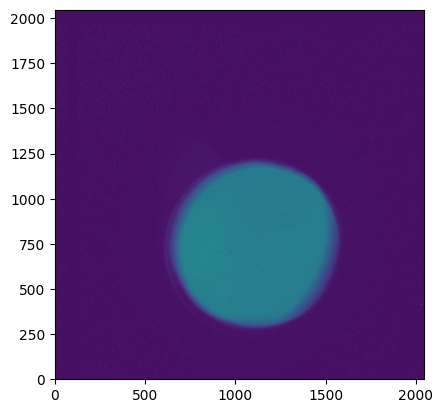

In [25]:
plt.imshow(hdul[0].data, origin='lower')

In [34]:
coord = wcs.pixel_to_world([1300], [1050])
coord

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    [(300.88347271, 37.32136361)]>

'0.999898 -40.5331'

In [55]:
from astropy.nddata import Cutout2D
original_data = hdul[0].data
original_header = hdul[0].header
original_wcs = WCS(original_header)
position = (300,300)  # Example position (x, y) in pixels
size = (600, 600)  # Example size (width, height) in pixels
cutout = Cutout2D(original_data, position, size, wcs=original_wcs, mode='strict')
cutout_wcs = cutout.wcs.to_header()
cutout_hdulist = fits.PrimaryHDU(data=cutout.data, header=cutout_wcs)

PartialOverlapError: Arrays overlap only partially.

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    [(300.87812831, 37.32797476)]>

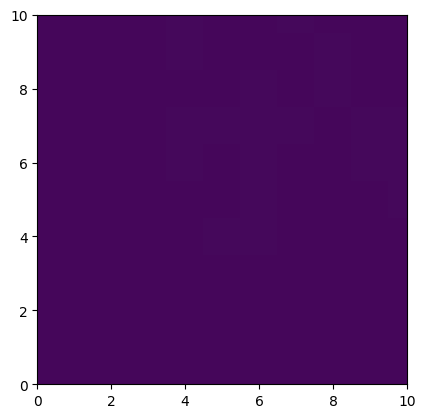

In [53]:
plt.imshow(cutout_hdulist.data, origin='lower')
plt.xlim(0,10)
plt.ylim(0,10)
coord = WCS(cutout_wcs).pixel_to_world([600], [600])
coord